In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [24]:
# df = pd.read_csv('annotations/geoff_5_12_2022.csv')
df = pd.read_csv('annotations/geoff_5_16_2022_final.csv')
df['Recall'] = df['has_good_recall']
del df['has_good_recall']
df['Precision'] = df['has_good_precision']
del df['has_good_precision']
df['Intuitiveness'] = df['is_intuitive']
del df['is_intuitive']
models = {
    'pretrained': 'GLoRIA',
    'baseline': 'GLoRIA Retrained',
    'wordmask': '+Word Masking',
    'clinicalmask': '+Clinical Masking',
    'noattn': '+\"No Attn\" Token',
    'abnormal': '+Abnormal',
    'baseline_supervised': '+30-Shot Finetuned',
}
df['Model'] = [models[m] for m in df['checkpoint_name']]
del df['checkpoint_name']
df['count'] = 1
df = pd.concat([df[df.Model == model] for model in models.values()])

def print_latex_table(df):
    print('Model & Recall & Precision & Intuitiveness\n\hline')
    for model in models.values():
        if len(df[df.Model == model]) == 1:
            row = df[df.Model == model].iloc[0]
            print('%s & %s & %s & %s \\\\' % (row.Model, row.Recall, row.Precision, row.Intuitiveness))


In [25]:
df

,dicom_sent_id,dicom_id,sent_id,prompt,is_custom_prompt,no_attn_score,Recall,Precision,Intuitiveness,Model,count
3,dicom_67bd451d-6f695b32-b8ce2be9-23c30cae-f6f9...,67bd451d-6f695b32-b8ce2be9-23c30cae-f6f94270,53209617|7,Small left pleural effusion is likely.,False,NaN,4,1,1,GLoRIA,1
4,dicom_6bcf7ea1-7d6d22d2-acc8b8c1-846af6af-7884...,6bcf7ea1-7d6d22d2-acc8b8c1-846af6af-78841c71,59788377|9,The aorta is calcified.,False,NaN,1,1,1,GLoRIA,1
10,dicom_2ab3e8df-5ac8ae5f-70507d62-07ff69fd-f892...,2ab3e8df-5ac8ae5f-70507d62-07ff69fd-f8926559,51426244|7,Mild cardiomegaly is noted.,False,NaN,5,1,1,GLoRIA,1
14,dicom_656a0ed5-94e2b62f-3116829b-785e87f2-aead...,656a0ed5-94e2b62f-3116829b-785e87f2-aead6091,59701436|4,"Right hemidiaphragm is moderately elevated, a ...",False,NaN,1,1,1,GLoRIA,1
18,dicom_600b88e8-cdeb206f-24980db9-a88d5336-a9ab...,600b88e8-cdeb206f-24980db9-a88d5336-a9ab05ba,53343765|5,Extensive consolidation in the left lung also ...,False,NaN,4,2,1,GLoRIA,1
...,...,...,...,...,...,...,...,...,...,...,...
328,dicom_2d40e27c-e780bb33-132a089e-a59bbe05-5640...,2d40e27c-e780bb33-132a089e-a59bbe05-564002e6,57148763|12,Chronic AP window calcified lymph node would n...,False,NaN,5,1,2,+30-Shot Finetuned,1
334,dicom_7325a4ad-56c62704-bb44d9f9-a7bc288f-b195...,7325a4ad-56c62704-bb44d9f9-a7bc288f-b195b550,58313672|6,Increasing opacities in the right base could r...,False,NaN,1,1,1,+30-Shot Finetuned,1
339,dicom_1290ac09-084d443b-579443d1-e276c5df-2d4e...,1290ac09-084d443b-579443d1-e276c5df-2d4ee178,50889933|10,Slight blunting of the posterior costophrenic ...,False,NaN,1,1,1,+30-Shot Finetuned,1
340,dicom_10cb57fc-b95678a1-0b994bae-d6efb434-5710...,10cb57fc-b95678a1-0b994bae-d6efb434-57103f95,59012265|16,Patchy ill-defined opacities in the lung bases...,False,NaN,3,2,2,+30-Shot Finetuned,1


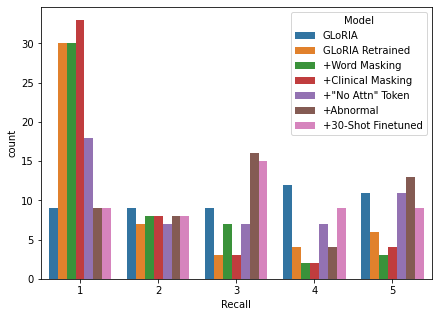

In [26]:
plt.figure(figsize=(7, 5))
sns.barplot(
    data=df[~df.is_custom_prompt].groupby(['Model', 'Recall']).sum().reset_index(),
    x='Recall', y='count', hue='Model', hue_order=models.values())
plt.savefig('recall.pdf')

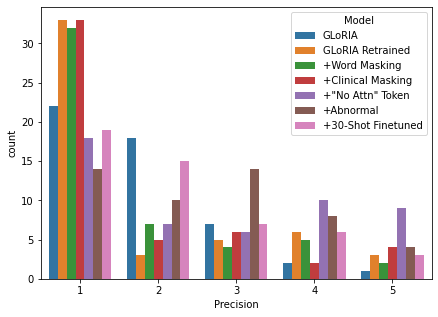

In [27]:
plt.figure(figsize=(7, 5))
sns.barplot(
    data=df[~df.is_custom_prompt].groupby(['Model', 'Precision']).sum().reset_index(),
    x='Precision', y='count', hue='Model', hue_order=models.values())
plt.savefig('precision.pdf')

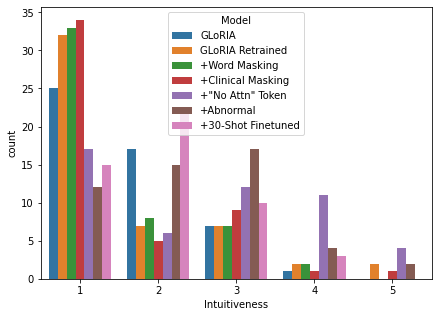

In [28]:
plt.figure(figsize=(7, 5))
sns.barplot(
    data=df[~df.is_custom_prompt].groupby(['Model', 'Intuitiveness']).sum().reset_index(),
    x='Intuitiveness', y='count', hue='Model', hue_order=models.values())
plt.savefig('intuitiveness.pdf')

In [29]:
print_latex_table(df[~df.is_custom_prompt].groupby(['Model']).mean().reset_index())

Model & Recall & Precision & Intuitiveness
\hline
GLoRIA & 3.14 & 1.84 & 1.68 \\
GLoRIA Retrained & 1.98 & 1.86 & 1.7 \\
+Word Masking & 1.8 & 1.76 & 1.56 \\
+Clinical Masking & 1.72 & 1.78 & 1.6 \\
+"No Attn" Token & 2.72 & 2.7 & 2.58 \\
+Abnormal & 3.08 & 2.56 & 2.38 \\
+30-Shot Finetuned & 3.02 & 2.18 & 2.02 \\


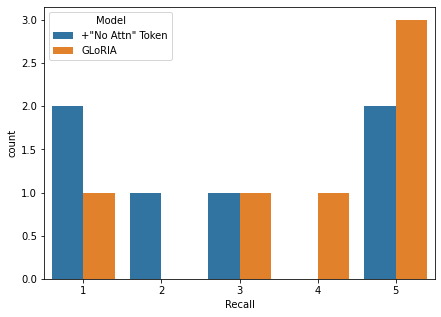

In [30]:
plt.figure(figsize=(7, 5))
sns.barplot(
    data=df[df.is_custom_prompt].groupby(['Model', 'Recall']).sum().reset_index(),
    x='Recall', y='count', hue='Model')
plt.savefig('recall_custom.pdf')

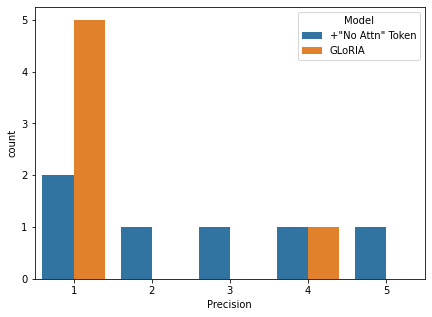

In [31]:
plt.figure(figsize=(7, 5))
sns.barplot(
    data=df[df.is_custom_prompt].groupby(['Model', 'Precision']).sum().reset_index(),
    x='Precision', y='count', hue='Model')
plt.savefig('precision_custom.pdf')

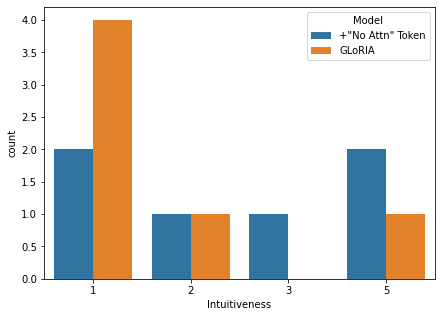

In [32]:
plt.figure(figsize=(7, 5))
sns.barplot(
    data=df[df.is_custom_prompt].groupby(['Model', 'Intuitiveness']).sum().reset_index(),
    x='Intuitiveness', y='count', hue='Model')
plt.savefig('intuitiveness_custom.pdf')

In [33]:
print_latex_table(df[df.is_custom_prompt].groupby(['Model']).mean().reset_index())

Model & Recall & Precision & Intuitiveness
\hline
GLoRIA & 3.8333333333333335 & 1.5 & 1.8333333333333333 \\
+"No Attn" Token & 2.8333333333333335 & 2.6666666666666665 & 2.8333333333333335 \\


In [34]:
df[~df.is_custom_prompt].groupby(['Model']).mean()

,is_custom_prompt,no_attn_score,Recall,Precision,Intuitiveness,count
Model,,,,,,
"+""No Attn"" Token",0.0,0.003488,2.72,2.70,2.58,1.0
+30-Shot Finetuned,0.0,NaN,3.02,2.18,2.02,1.0
+Abnormal,0.0,NaN,3.08,2.56,2.38,1.0
+Clinical Masking,0.0,NaN,1.72,1.78,1.60,1.0
+Word Masking,0.0,NaN,1.80,1.76,1.56,1.0
GLoRIA,0.0,NaN,3.14,1.84,1.68,1.0
GLoRIA Retrained,0.0,NaN,1.98,1.86,1.70,1.0


<ipython-input-85-92d14ac26f13>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart1.set_yticklabels(['0', '0-20', '20-40', '40-60', '60-80', '80-100'])
<ipython-input-85-92d14ac26f13>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart2.set_yticklabels(['0', '0-20', '20-40', '40-60', '60-80', '80-100'])


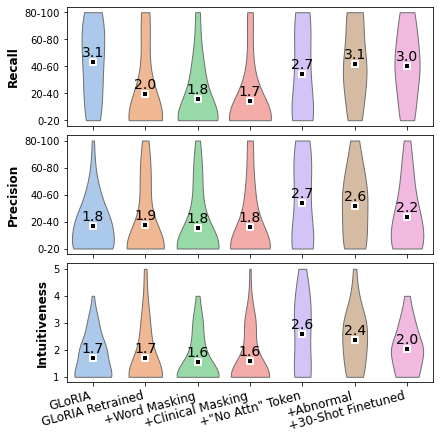

In [85]:
import copy
fig, axs = plt.subplots(3, 1, figsize=(6,6), sharex=True, constrained_layout=True)
palette = sns.color_palette('pastel')
models = ['GLoRIA', 'GLoRIA Retrained', '+Word Masking', '+Clinical Masking',
          '+"No Attn" Token', '+Abnormal', '+30-Shot Finetuned']
mean_data = pd.concat([df[(~df.is_custom_prompt) & (df.Model == m)].groupby(['Model']).mean() for m in models])
chart1 = sns.violinplot(data=df[~df.is_custom_prompt], x='Model', y='Recall', cut=0, linewidth=1, ax=axs[0], bw=.6, inner=None, order=models, palette=palette)
axis=chart1.axis()
chart1 = sns.scatterplot(data=mean_data, x='Model', y='Recall', ax=chart1, color='black', marker='s', linewidth=2)
for i, row in mean_data.iterrows():
    chart1.annotate('%.1f' % row.Recall, xy=(i, row.Recall + .2), horizontalalignment='center', color='black', fontsize=14)
chart1.axis(axis)
chart2 = sns.violinplot(data=df[~df.is_custom_prompt], x='Model', y='Precision', cut=0, linewidth=1, ax=axs[1], bw=.6, inner=None, order=models, palette=palette)
axis=chart2.axis()
chart2 = sns.scatterplot(data=mean_data, x='Model', y='Precision', ax=chart2, color='black', marker='s', linewidth=2)
for i, row in mean_data.iterrows():
    chart2.annotate('%.1f' % row.Precision, xy=(i, row.Precision + .2), horizontalalignment='center', color='black', fontsize=14)
chart2.axis(axis)
chart3 = sns.violinplot(data=df[~df.is_custom_prompt], x='Model', y='Intuitiveness', cut=0, linewidth=1, ax=axs[2], bw=.6, inner=None, order=models, palette=palette)
axis = chart3.axis()
chart3 = sns.scatterplot(data=mean_data, x='Model', y='Intuitiveness', ax=chart3, color='black', marker='s', linewidth=2)
for i, row in mean_data.iterrows():
    chart3.annotate('%.1f' % row.Intuitiveness, xy=(i, row.Intuitiveness + .2), horizontalalignment='center', color='black', fontsize=14)
chart3.axis(axis)

# chart1 = sns.boxplot(data=df[~df.is_custom_prompt], x='Model', y='Recall', linewidth=2, ax=axs[0])
# chart2 = sns.boxplot(data=df[~df.is_custom_prompt], x='Model', y='Precision', linewidth=2, ax=axs[1])
# chart3 = sns.boxplot(data=df[~df.is_custom_prompt], x='Model', y='Intuitiveness', linewidth=2, ax=axs[2])
chart3.set_xticklabels(chart3.get_xticklabels(), rotation=15, horizontalalignment='right', fontsize=12)
chart1.set_yticklabels(['0', '0-20', '20-40', '40-60', '60-80', '80-100'])
chart2.set_yticklabels(['0', '0-20', '20-40', '40-60', '60-80', '80-100'])
chart1.set_xlabel(None)
chart2.set_xlabel(None)
chart3.set_xlabel(None)
chart1.set_ylabel('Recall', fontsize=12, fontweight='bold')
chart2.set_ylabel('Precision', fontsize=12, fontweight='bold')
chart3.set_ylabel('Intuitiveness', fontsize=12, fontweight='bold')
plt.savefig('annotations.pdf')


<ipython-input-124-ac26856c02da>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart1.set_yticklabels(['0', '0-20', '20-40', '40-60', '60-80', '80-100'])
<ipython-input-124-ac26856c02da>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart2.set_yticklabels(['0', '0-20', '20-40', '40-60', '60-80', '80-100'])


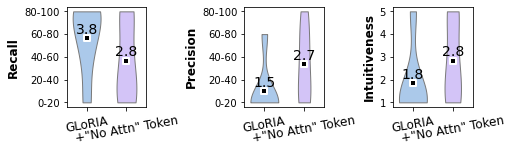

In [124]:
fig, axs = plt.subplots(1, 3, figsize=(7,2),constrained_layout = True)

models = ['GLoRIA',
          '+"No Attn" Token',]
palette = [sns.color_palette('pastel')[0], sns.color_palette('pastel')[4]]
mean_data = pd.concat([df[(df.is_custom_prompt) & (df.Model == m)].groupby(['Model']).mean() for m in models])
chart1 = sns.violinplot(data=df[df.is_custom_prompt], x='Model', y='Recall', cut=0, linewidth=1, ax=axs[0], bw=.6, width=.7, inner=None, palette=palette)
axis=chart1.axis()
chart1 = sns.scatterplot(data=mean_data, x='Model', y='Recall', ax=chart1, color='black', marker='s', linewidth=2)
for i, row in mean_data.iterrows():
    chart1.annotate('%.1f' % row.Recall, xy=(i, row.Recall + .2), horizontalalignment='center', color='black', fontsize=14)
chart1.axis(axis)
chart2 = sns.violinplot(data=df[df.is_custom_prompt], x='Model', y='Precision', cut=0, linewidth=1, ax=axs[1], bw=.6, width=.7, inner=None, palette=palette)
axis=chart2.axis()
chart2 = sns.scatterplot(data=mean_data, x='Model', y='Precision', ax=chart2, color='black', marker='s', linewidth=2)
for i, row in mean_data.iterrows():
    chart2.annotate('%.1f' % row.Precision, xy=(i, row.Precision + .2), horizontalalignment='center', color='black', fontsize=14)
chart2.axis(axis)
chart3 = sns.violinplot(data=df[df.is_custom_prompt], x='Model', y='Intuitiveness', cut=0, linewidth=1, ax=axs[2], bw=.6, width=.7, inner=None, palette=palette)
axis = chart3.axis()
chart3 = sns.scatterplot(data=mean_data, x='Model', y='Intuitiveness', ax=chart3, color='black', marker='s', linewidth=2)
for i, row in mean_data.iterrows():
    chart3.annotate('%.1f' % row.Intuitiveness, xy=(i, row.Intuitiveness + .2), horizontalalignment='center', color='black', fontsize=14)
chart3.axis(axis)
# chart1 = sns.boxplot(data=df[~df.is_custom_prompt], x='Model', y='Recall', linewidth=2, ax=axs[0])
# chart2 = sns.boxplot(data=df[~df.is_custom_prompt], x='Model', y='Precision', linewidth=2, ax=axs[1])
# chart3 = sns.boxplot(data=df[~df.is_custom_prompt], x='Model', y='Intuitiveness', linewidth=2, ax=axs[2])
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=10, horizontalalignment='center', fontsize=12)
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=10, horizontalalignment='center', fontsize=12)
chart3.set_xticklabels(chart3.get_xticklabels(), rotation=10, horizontalalignment='center', fontsize=12)
chart1.set_yticklabels(['0', '0-20', '20-40', '40-60', '60-80', '80-100'])
chart2.set_yticklabels(['0', '0-20', '20-40', '40-60', '60-80', '80-100'])
chart1.set_xlabel(None)
chart2.set_xlabel(None)
chart3.set_xlabel(None)
chart1.set_ylabel('Recall', fontsize=12, fontweight='bold')
chart2.set_ylabel('Precision', fontsize=12, fontweight='bold')
chart3.set_ylabel('Intuitiveness', fontsize=12, fontweight='bold')
plt.savefig('annotations_custom.pdf')

In [90]:
gold_sents = pd.read_csv('/scratch/mcinerney.de/imagenome/physionet.org/files/chest-imagenome/1.0.0/gold_sentences.csv')

In [91]:
merged = df.merge(gold_sents, on='dicom_sent_id')
df_with_labels = []
for i, row in merged.iterrows():
    for context, label in zip(eval(row.sent_contexts), eval(row.sent_labels)):
        if context == 'yes':
            row['label_'+label] = True
    df_with_labels.append(row)
df_with_labels = pd.DataFrame(df_with_labels)
for key in df_with_labels.keys():
    if key.startswith('label_'):
        series = df_with_labels[key]
        series[series.isna()] = False
        df_with_labels[key] = series
df_with_labels

<ipython-input-91-0687fc578d3c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series[series.isna()] = False
<ipython-input-91-0687fc578d3c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series[series.isna()] = False
<ipython-input-91-0687fc578d3c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series[series.isna()] = False
<ipython-input-91-0687fc578d3c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

,dicom_sent_id,dicom_id_x,sent_id_x,prompt,is_custom_prompt,no_attn_score,Recall,Precision,Intuitiveness,Model,...,label_pneumothorax,label_aspiration,label_lobar/segmental collapse,label_sub-diaphragmatic air,label_airspace opacity,label_enlarged hilum,label_fluid overload/heart failure,label_superior mediastinal mass/enlargement,label_chest tube,label_calcified nodule
0,dicom_67bd451d-6f695b32-b8ce2be9-23c30cae-f6f9...,67bd451d-6f695b32-b8ce2be9-23c30cae-f6f94270,53209617|7,Small left pleural effusion is likely.,False,NaN,4,1,1,GLoRIA,...,False,False,False,False,False,False,False,False,False,False
1,dicom_67bd451d-6f695b32-b8ce2be9-23c30cae-f6f9...,67bd451d-6f695b32-b8ce2be9-23c30cae-f6f94270,53209617|7,Small left pleural effusion is likely.,False,NaN,3,3,3,GLoRIA Retrained,...,False,False,False,False,False,False,False,False,False,False
2,dicom_67bd451d-6f695b32-b8ce2be9-23c30cae-f6f9...,67bd451d-6f695b32-b8ce2be9-23c30cae-f6f94270,53209617|7,Small left pleural effusion is likely.,False,NaN,3,3,3,+Word Masking,...,False,False,False,False,False,False,False,False,False,False
3,dicom_67bd451d-6f695b32-b8ce2be9-23c30cae-f6f9...,67bd451d-6f695b32-b8ce2be9-23c30cae-f6f94270,53209617|7,Small left pleural effusion is likely.,False,NaN,3,3,3,+Clinical Masking,...,False,False,False,False,False,False,False,False,False,False
4,dicom_67bd451d-6f695b32-b8ce2be9-23c30cae-f6f9...,67bd451d-6f695b32-b8ce2be9-23c30cae-f6f94270,53209617|7,Small left pleural effusion is likely.,False,0.002518,5,4,4,"+""No Attn"" Token",...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,dicom_10cb57fc-b95678a1-0b994bae-d6efb434-5710...,10cb57fc-b95678a1-0b994bae-d6efb434-57103f95,59012265|16,Patchy ill-defined opacities in the lung bases...,False,NaN,1,1,1,+Word Masking,...,False,True,False,False,False,False,False,False,False,False
346,dicom_10cb57fc-b95678a1-0b994bae-d6efb434-5710...,10cb57fc-b95678a1-0b994bae-d6efb434-57103f95,59012265|16,Patchy ill-defined opacities in the lung bases...,False,NaN,1,1,1,+Clinical Masking,...,False,True,False,False,False,False,False,False,False,False
347,dicom_10cb57fc-b95678a1-0b994bae-d6efb434-5710...,10cb57fc-b95678a1-0b994bae-d6efb434-57103f95,59012265|16,Patchy ill-defined opacities in the lung bases...,False,0.002713,2,4,3,"+""No Attn"" Token",...,False,True,False,False,False,False,False,False,False,False
348,dicom_10cb57fc-b95678a1-0b994bae-d6efb434-5710...,10cb57fc-b95678a1-0b994bae-d6efb434-57103f95,59012265|16,Patchy ill-defined opacities in the lung bases...,False,NaN,5,3,4,+Abnormal,...,False,True,False,False,False,False,False,False,False,False


In [92]:
label_info = []
models = set(df_with_labels['Model'])
for model in models:
    df_with_labels_for_model = df_with_labels[df_with_labels.Model == model]
    for key, value in df_with_labels_for_model.sum().items():
        if key.startswith('label_'):
            label_info.append({
                'Model': model,
                'Condition': key[len('label_'):],
                'Correlation with Intuitiveness': df_with_labels_for_model.Intuitiveness.corr(
                    df_with_labels_for_model[key].astype(float)),
                'Intuitiveness for Subset': df_with_labels_for_model.Intuitiveness[
                    df_with_labels_for_model[key].astype(bool)].mean(),
                'Frequency in Annotations': value,
            })
label_info = pd.DataFrame(label_info)
label_info

,Model,Condition,Correlation with Intuitiveness,Intuitiveness for Subset,Frequency in Annotations
0,+Abnormal,abnormal,0.145360,2.461538,39
1,+Abnormal,lung opacity,0.142093,2.518519,27
2,+Abnormal,pleural effusion,0.127696,2.714286,7
3,+Abnormal,vascular calcification,0.023191,2.500000,2
4,+Abnormal,enlarged cardiac silhouette,0.291410,3.142857,7
...,...,...,...,...,...
205,GLoRIA,enlarged hilum,0.239951,3.000000,1
206,GLoRIA,fluid overload/heart failure,0.058170,2.000000,1
207,GLoRIA,superior mediastinal mass/enlargement,0.239951,3.000000,1
208,GLoRIA,chest tube,0.058170,2.000000,1


In [93]:
intuitiveness_correlations = {}
intuitiveness_for_subset = {}
models = ['GLoRIA', 'GLoRIA Retrained', '+Word Masking', '+Clinical Masking',
          '+"No Attn" Token', '+Abnormal', '+30-Shot Finetuned']
for model in models:
    intuitiveness_correlations[model] = {}
    intuitiveness_for_subset[model] = {}
    rows = label_info[label_info.Model==model].sort_values('Frequency in Annotations', ascending=False)[:10]
    for i, row in rows.iterrows():
        intuitiveness_correlations[model][
            row.Condition + ' (' + str(row['Frequency in Annotations']) + ')'] = row['Correlation with Intuitiveness']
        intuitiveness_for_subset[model][
            row.Condition + ' (' + str(row['Frequency in Annotations']) + ')'] = row['Intuitiveness for Subset']
intuitiveness_correlations = pd.DataFrame(intuitiveness_correlations).transpose()
intuitiveness_for_subset = pd.DataFrame(intuitiveness_for_subset).transpose()

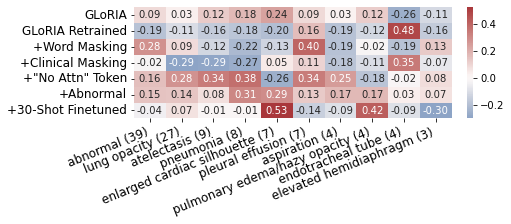

In [119]:
plt.figure(constrained_layout = True, figsize=(7, 3))
chart = sns.heatmap(intuitiveness_correlations, center=0, annot=True, fmt='.2f', cmap='vlag')
chart.set_yticklabels([x.get_text()[len('Retrained '):] if x.get_text().startswith('Retrained ') else x
                       for x in chart.get_yticklabels()], fontsize=12)
chart.set_xticklabels(chart.get_xticklabels(), rotation=22, horizontalalignment='right', fontsize=12)
plt.savefig('intuitiveness_correlation_with_conditions.pdf')

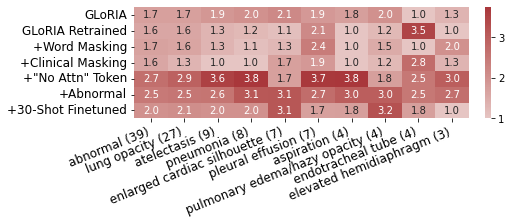

In [120]:
plt.figure(constrained_layout = True, figsize=(7, 3))
chart = sns.heatmap(intuitiveness_for_subset, annot=True, fmt='.1f', cmap='vlag', center=0)
chart.set_yticklabels([x.get_text()[len('Retrained '):] if x.get_text().startswith('Retrained ') else x
                       for x in chart.get_yticklabels()], fontsize=12)
chart.set_xticklabels(chart.get_xticklabels(), rotation=22, horizontalalignment='right', fontsize=12)
plt.savefig('intuitiveness_for_condition_subsets.pdf')
